In [1]:
#Import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Read data files

data15 = pd.read_csv("Resources/2015.csv")
data16 = pd.read_csv("Resources/2016.csv")
DGE_GDP = pd.read_csv("Resources/DGE GDP.csv")
DGE = pd.read_csv("Resources/DGE PPP.csv")
DPE = pd.read_csv("Resources/DPE PPP.csv")
OOP = pd.read_csv("Resources/OOP PPP.csv")

In [3]:
#Create clean data15 and data16

drop15 = ['Happiness Rank', 'Standard Error', 'Family', 'Health (Life Expectancy)',
          'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']
data15.drop(columns = drop15, inplace = True)
data15.head()

,Country,Region,Happiness Score,Economy (GDP per Capita)
0,Switzerland,Western Europe,7.587,1.39651
1,Iceland,Western Europe,7.561,1.30232
2,Denmark,Western Europe,7.527,1.32548
3,Norway,Western Europe,7.522,1.45900
4,Canada,North America,7.427,1.32629


In [4]:
drop16 = ['Region', 'Happiness Rank', 'Lower Confidence Interval', 'Upper Confidence Interval',
          'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 
          'Generosity', 'Dystopia Residual']
data16.drop(columns = drop16, inplace = True)
data16.head()

,Country,Happiness Score,Economy (GDP per Capita)
0,Denmark,7.526,1.44178
1,Switzerland,7.509,1.52733
2,Iceland,7.501,1.42666
3,Norway,7.498,1.57744
4,Finland,7.413,1.40598


In [5]:
#Merge data files

data_combined = pd.merge(data15, data16, on = "Country", suffixes=('_2015', '_2016'))
data_combined.head

#Save to a new csv file

data_combined.to_csv("Output/Clean Happiness Data.csv")

In [6]:
#Merge expenditure files

DGE_combined = pd.merge(DGE_GDP, DGE, on = 'Countries', suffixes=('_DGE', '_PPP'))
DGE_and_private = pd.merge(DGE_combined, DPE, on = 'Countries')
expenditure_data = pd.merge(DGE_and_private, OOP, on = 'Countries')
expenditure_data = expenditure_data.rename(columns={"Countries":"Country"})
expenditure_data.head

#Save to a new csv file

expenditure_data.to_csv('Output/Expenditure Data.csv')

In [7]:
#Merge new data and new expenditure files

happiness_expenditure = pd.merge(data_combined, expenditure_data, on = "Country")
happiness_expenditure = happiness_expenditure.dropna(how = "any")
happiness_expenditure.head()

,Country,Region,Happiness Score_2015,Economy (GDP per Capita)_2015,Happiness Score_2016,Economy (GDP per Capita)_2016,2015 Domestic General Government Health Expenditure (GGHE-D) as % Gross Domestic Product (GDP),2016 Domestic General Government Health Expenditure (GGHE-D) as % Gross Domestic Product (GDP),2015 Domestic General Government Health Expenditure (GGHE-D) per Capita in PPP Int$,2016 Domestic General Government Health Expenditure (GGHE-D) per Capita in PPP Int$,2015 Domestic Private Health Expenditure (PVT-D) per Capita in PPP Int$,2016 Domestic Private Health Expenditure (PVT-D) per Capita in PPP Int$,2015 Out-of-Pocket Expenditure (OOPS) per Capita in PPP Int$,2016 Out-of-Pocket Expenditure (OOPS) per Capita in PPP Int$
0,Switzerland,Western Europe,7.587,1.39651,7.509,1.52733,8,8.0,"4,822","4,939","2,789","2,928","2,213","2,326"
1,Iceland,Western Europe,7.561,1.30232,7.501,1.42666,7,7.0,"3,210","3,460",762,785,700,716
2,Denmark,Western Europe,7.527,1.32548,7.526,1.44178,9,9.0,"4,227","4,284",794,809,687,698
3,Norway,Western Europe,7.522,1.45900,7.498,1.57744,9,9.0,"5,360","5,281",908,922,886,901
4,Canada,North America,7.427,1.32629,7.404,1.44015,8,8.0,"3,401","3,465","1,216","1,253",668,690


In [8]:
#Save to a new csv file

happiness_expenditure.to_csv('Output/Happiness and Expenditure.csv')

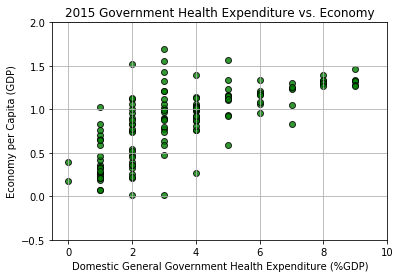

In [9]:
#Create plots

plt.scatter(happiness_expenditure['2015 Domestic General Government Health Expenditure (GGHE-D) as % Gross Domestic Product (GDP)'],
            happiness_expenditure['Economy (GDP per Capita)_2015'], 
            edgecolor="black", linewidths=1, marker="o", alpha=0.8, color = 'g')

plt.title("2015 Government Health Expenditure vs. Economy")
plt.xlabel("Domestic General Government Health Expenditure (%GDP)")
plt.ylabel("Economy per Capita (GDP)")
plt.grid(True)
plt.xlim([-.5, 10])
plt.ylim([-.5, 2])

#save figure

plt.savefig("Output/2015 Economy vs. Govt.png")

#show plot

plt.show()

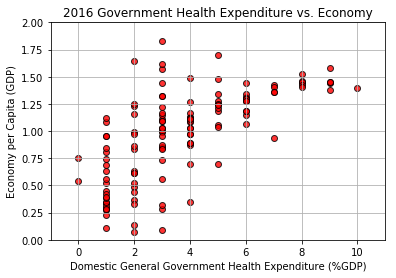

In [10]:
#Create plots

plt.scatter(happiness_expenditure['2016 Domestic General Government Health Expenditure (GGHE-D) as % Gross Domestic Product (GDP)'],
            happiness_expenditure['Economy (GDP per Capita)_2016'], 
            edgecolor="black", linewidths=1, marker="o", alpha=0.8, color = 'r')

plt.title("2016 Government Health Expenditure vs. Economy")
plt.xlabel("Domestic General Government Health Expenditure (%GDP)")
plt.ylabel("Economy per Capita (GDP)")
plt.grid(True)
plt.ylim([0, 2])
plt.xlim([-1, 11])

#save figure

plt.savefig("Output/2016 Economy vs. Govt.png")

#show plot

plt.show()

In [11]:
#happiness_expenditure['2015 Domestic Private Health Expenditure (PVT-D) per Capita in PPP Int$'].str.replace(',','').astype(int)

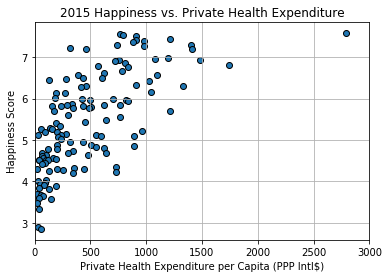

In [12]:
plt.scatter(happiness_expenditure['2015 Domestic Private Health Expenditure (PVT-D) per Capita in PPP Int$'].str.replace(',','').astype(int), 
            happiness_expenditure['Happiness Score_2015'], edgecolor="black", linewidths=1, marker="o")

plt.title(f"2015 Happiness vs. Private Health Expenditure")
plt.ylabel("Happiness Score")
plt.xlabel("Private Health Expenditure per Capita (PPP Intl$)")
plt.xlim([0,3000])
plt.grid(True)

#save figure

plt.savefig("Output/2015 Happiness vs. PVT-D.png")

#show plot

plt.show()

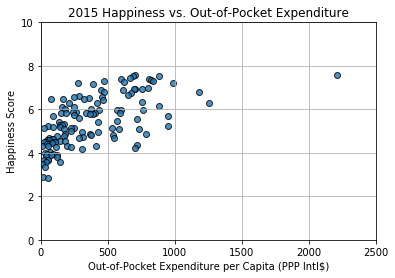

In [13]:
plt.scatter(happiness_expenditure['2015 Out-of-Pocket Expenditure (OOPS) per Capita in PPP Int$'].str.replace(',','').astype(int), 
            happiness_expenditure['Happiness Score_2015'], edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)

plt.title(f"2015 Happiness vs. Out-of-Pocket Expenditure")
plt.ylabel("Happiness Score")
plt.xlabel("Out-of-Pocket Expenditure per Capita (PPP Intl$)")
plt.grid(True)
plt.xlim([0, 2500])
plt.ylim([0, 10])

#save figure

plt.savefig("Output/2015 Happiness vs. OOPS.png")

#show plot

plt.show()

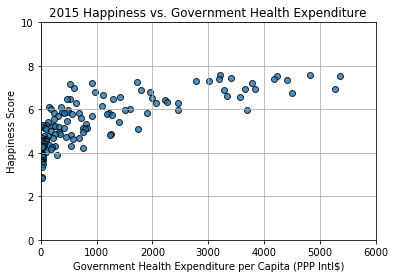

In [14]:
plt.scatter(happiness_expenditure['2015 Domestic General Government Health Expenditure (GGHE-D) per Capita in PPP Int$'].str.replace(',','').astype(int), 
            happiness_expenditure['Happiness Score_2015'], edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)

plt.title(f"2015 Happiness vs. Government Health Expenditure")
plt.ylabel("Happiness Score")
plt.xlabel("Government Health Expenditure per Capita (PPP Intl$)")
plt.grid(True)
plt.xlim([0, 6000])
plt.ylim([0, 10])

#save figure

plt.savefig("Output/2015 Happiness vs. GGHE-D.png")

#show plot

plt.show()

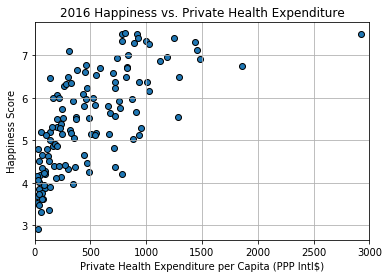

In [15]:
plt.scatter(happiness_expenditure['2016 Domestic Private Health Expenditure (PVT-D) per Capita in PPP Int$'].str.replace(',','').astype(int), 
            happiness_expenditure['Happiness Score_2016'], edgecolor="black", linewidths=1, marker="o")

plt.title(f"2016 Happiness vs. Private Health Expenditure")
plt.ylabel("Happiness Score")
plt.xlabel("Private Health Expenditure per Capita (PPP Intl$)")
plt.xlim([0,3000])
plt.grid(True)

#save figure

plt.savefig("Output/2016 Happiness vs. PVT-D.png")

#show plot

plt.show()

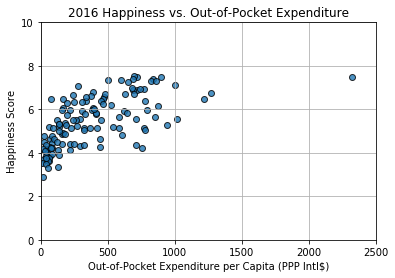

In [16]:
plt.scatter(happiness_expenditure['2016 Out-of-Pocket Expenditure (OOPS) per Capita in PPP Int$'].str.replace(',','').astype(int), 
            happiness_expenditure['Happiness Score_2016'], edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)

plt.title(f"2016 Happiness vs. Out-of-Pocket Expenditure")
plt.ylabel("Happiness Score")
plt.xlabel("Out-of-Pocket Expenditure per Capita (PPP Intl$)")
plt.grid(True)
plt.xlim([0, 2500])
plt.ylim([0, 10])

#save figure

plt.savefig("Output/2016 Happiness vs. OOPS.png")

#show plot

plt.show()

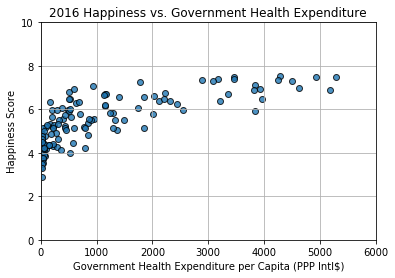

In [17]:
plt.scatter(happiness_expenditure['2016 Domestic General Government Health Expenditure (GGHE-D) per Capita in PPP Int$'].str.replace(',','').astype(int), 
            happiness_expenditure['Happiness Score_2016'], edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)

plt.title(f"2016 Happiness vs. Government Health Expenditure")
plt.ylabel("Happiness Score")
plt.xlabel("Government Health Expenditure per Capita (PPP Intl$)")
plt.grid(True)
plt.xlim([0, 6000])
plt.ylim([0, 10])

#save figure

plt.savefig("Output/2016 Happiness vs. GGHE-D.png")

#show plot

plt.show()